<a href="https://colab.research.google.com/github/Jirtus-sanasam/MLP-Diabetes/blob/main/Diabetes4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Step1: Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, accuracy_score)
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Step2: Data Accusation
df = pd.read_csv("/content/diabetes_data2.csv")

In [22]:
print(df.head().T)

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
Outcome                     1.000   0.000    1.000   0.000    1.000


In [23]:
# Step3: Separating Independent and Dependent Variables
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

In [24]:
print(X.head().T)
print(Y.head().T)
print(X.shape)
print(Y.shape)

                                0       1        2       3        4
Pregnancies                 6.000   1.000    8.000   1.000    0.000
Glucose                   148.000  85.000  183.000  89.000  137.000
BloodPressure              72.000  66.000   64.000  66.000   40.000
SkinThickness              35.000  29.000    0.000  23.000   35.000
Insulin                     0.000   0.000    0.000  94.000  168.000
BMI                        33.600  26.600   23.300  28.100   43.100
DiabetesPedigreeFunction    0.627   0.351    0.672   0.167    2.288
Age                        50.000  31.000   32.000  21.000   33.000
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64
(768, 8)
(768,)


In [25]:
# Step4: Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
# Step5: Seperating slected features
selected_features = ['DiabetesPedigreeFunction', 'Glucose', 'BloodPressure', 'Age', 'BMI']

# Keep only those features in your training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(X_test_selected.head().T)

                            668      324      624      690     473
DiabetesPedigreeFunction   0.43    0.148    0.158    0.856    0.21
Glucose                   98.00  112.000  108.000  107.000  136.00
BloodPressure             58.00   75.000   64.000   80.000   90.00
Age                       43.00   21.000   21.000   34.000   50.00
BMI                       34.00   35.700   30.800   24.600   29.90


In [27]:
# Step6:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)
print((X_train_selected).T)

                             60       618      346      294      231      340  \
DiabetesPedigreeFunction   0.304    1.282    0.654    0.254    0.238    0.472   
Glucose                   84.000  112.000  139.000  161.000  134.000  130.000   
BloodPressure              0.000   82.000   46.000   50.000   80.000   70.000   
Age                       21.000   50.000   22.000   65.000   46.000   22.000   
BMI                        0.000   28.200   28.700   21.900   46.200   25.900   

                              535      306      718     90   ...     466  \
DiabetesPedigreeFunction    0.302    0.326    0.415   0.258  ...   0.269   
Glucose                   132.000  161.000  108.000  80.000  ...  74.000   
BloodPressure               0.000   68.000   60.000  55.000  ...  52.000   
Age                        23.000   47.000   24.000  21.000  ...  22.000   
BMI                        32.900   25.500   35.500  19.100  ...  27.800   

                             121      614      20       

In [28]:
# Convert scaled numpy array back to DataFrame for easier view
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_selected.columns)
print(X_train_scaled_df.T)


                               0         1         2         3         4    \
DiabetesPedigreeFunction -0.490735  2.415030  0.549161 -0.639291 -0.686829   
Glucose                  -1.151398 -0.276643  0.566871  1.254179  0.410665   
BloodPressure            -3.752683  0.680345 -1.265862 -1.049617  0.572222   
Age                      -1.035940  1.487101 -0.948939  2.792122  1.139095   
BMI                      -4.135256 -0.489169 -0.424522 -1.303720  1.838121   

                               5         6         7         8         9    \
DiabetesPedigreeFunction  0.008415 -0.496677 -0.425370 -0.160939 -0.627407   
Glucose                   0.285700  0.348182  1.254179 -0.401608 -1.276363   
BloodPressure             0.031609 -3.752683 -0.076513 -0.509004 -0.779311   
Age                      -0.948939 -0.861938  1.226097 -0.774936 -1.035940   
BMI                      -0.786545  0.118512 -0.838262  0.454676 -1.665743   

                          ...       604       605       606   

In [29]:
# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, Y_train)


In [30]:
print("Before SMOTE:", np.bincount(Y_train))
print("After SMOTE:", np.bincount(y_train_balanced))

Before SMOTE: [401 213]
After SMOTE: [401 401]


In [31]:
# Check the shape of the balanced training data
print("X_train_balanced shape:", X_train_balanced.shape)
print("y_train_balanced shape:", y_train_balanced.shape)


X_train_balanced shape: (802, 5)
y_train_balanced shape: (802,)


In [32]:
# Create and train the baseline MLP
mlp_baseline = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp_baseline.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_baseline = mlp_baseline.predict(X_test_scaled)
y_pred_proba_baseline = mlp_baseline.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_baseline = accuracy_score(Y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(Y_test, y_pred_proba_baseline)

print(f"\nBaseline MLP Accuracy: {accuracy_baseline:.4f}")
print(f"Baseline MLP ROC-AUC: {roc_auc_baseline:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_baseline))


Baseline MLP Accuracy: 0.7273
Baseline MLP ROC-AUC: 0.8149

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



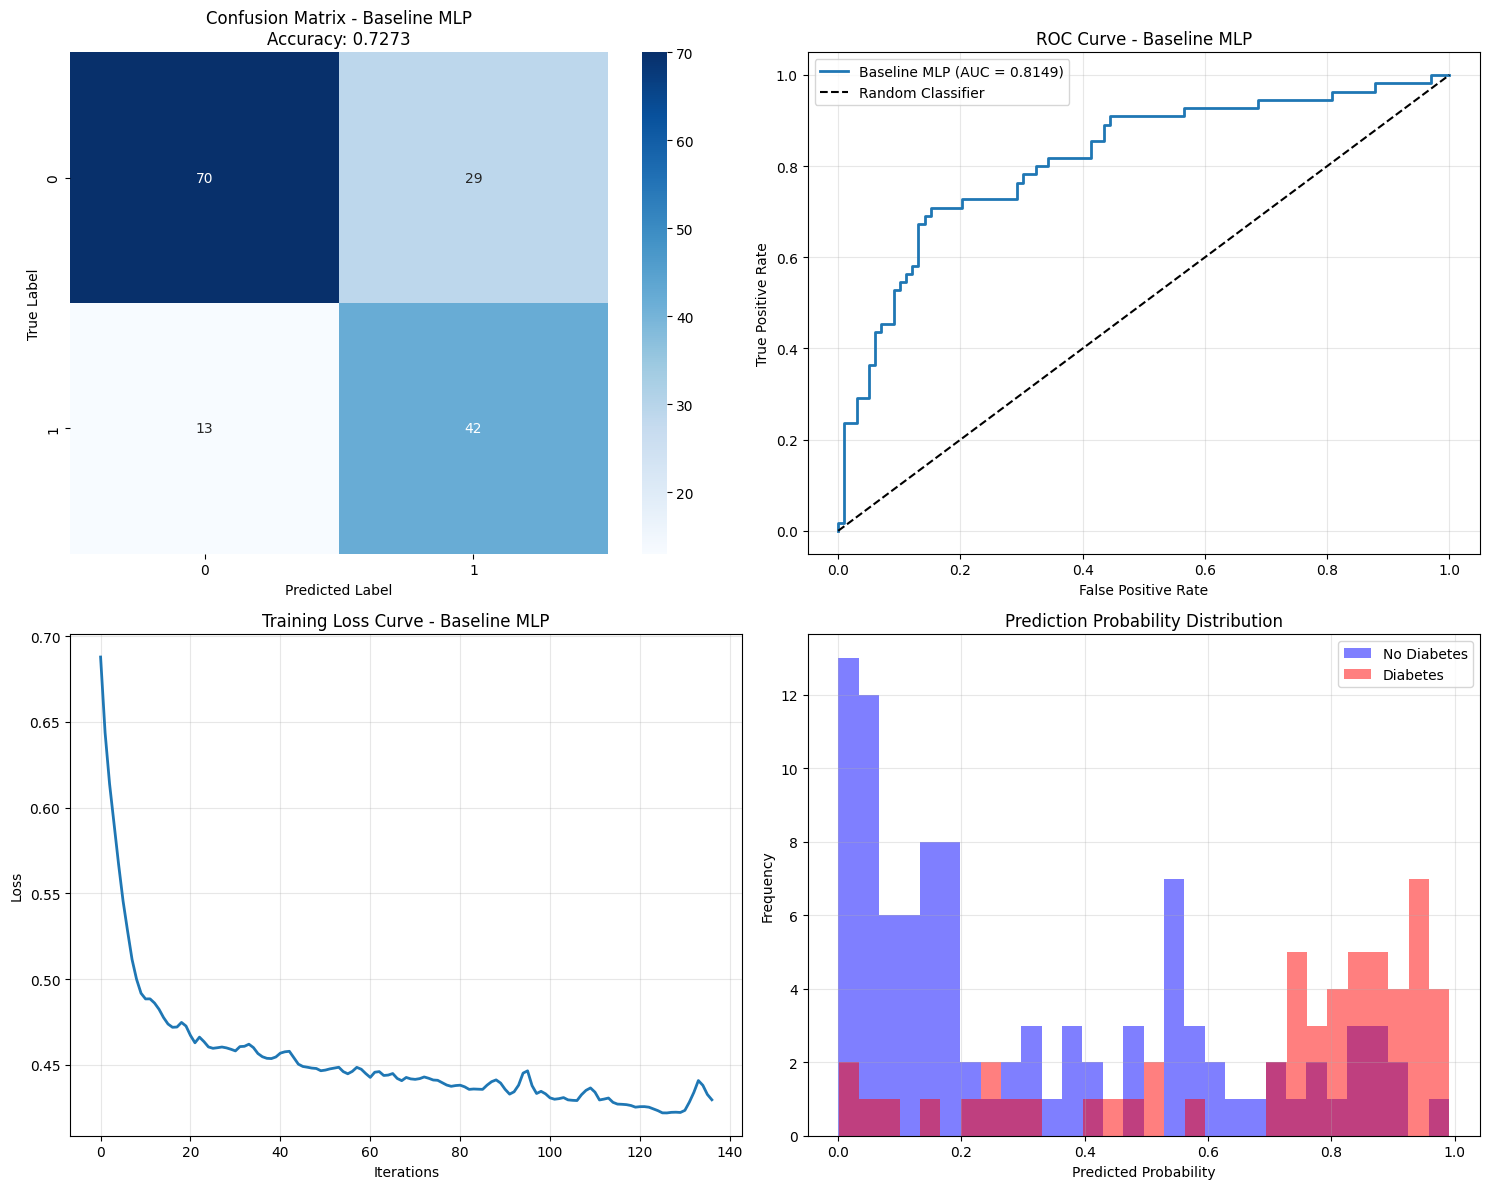

In [33]:
# Step 8: Visualizations for Baseline MLP
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm_baseline = confusion_matrix(Y_test, y_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title(f'Confusion Matrix - Baseline MLP\nAccuracy: {accuracy_baseline:.4f}')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr_baseline, tpr_baseline, _ = roc_curve(Y_test, y_pred_proba_baseline)
axes[0, 1].plot(fpr_baseline, tpr_baseline, label=f'Baseline MLP (AUC = {roc_auc_baseline:.4f})', linewidth=2)
axes[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - Baseline MLP')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Training Loss Curve
axes[1, 0].plot(mlp_baseline.loss_curve_, linewidth=2)
axes[1, 0].set_xlabel('Iterations')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('Training Loss Curve - Baseline MLP')
axes[1, 0].grid(True, alpha=0.3)

# 4. Prediction Distribution
axes[1, 1].hist(y_pred_proba_baseline[Y_test == 0], bins=30, alpha=0.5, label='No Diabetes', color='blue')
axes[1, 1].hist(y_pred_proba_baseline[Y_test == 1], bins=30, alpha=0.5, label='Diabetes', color='red')
axes[1, 1].set_xlabel('Predicted Probability')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Prediction Probability Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# Step 9: Genetic Algorithm Optimization for MLP
print("\n" + "="*60)
print("GENETIC ALGORITHM OPTIMIZATION")
print("="*60)

from sklearn.base import clone

class GeneticAlgorithmMLPOptimizer:
    def __init__(self, X_train, y_train, X_test, y_test,
                 population_size=20, generations=30, mutation_rate=0.1):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.best_params = None
        self.best_fitness = 0
        self.fitness_history = []

    def create_individual(self):
        """Create a random individual (MLP hyperparameters)"""
        individual = {
            'hidden_layer_1': np.random.choice([32, 64, 100, 128, 150]),
            'hidden_layer_2': np.random.choice([16, 32, 50, 64, 100]),
            'activation': np.random.choice(['relu', 'tanh', 'logistic']),
            'learning_rate_init': np.random.uniform(0.0001, 0.01),
            'alpha': np.random.uniform(0.0001, 0.01),
            'batch_size': np.random.choice([32, 64, 128, 256])
        }
        return individual

    def fitness_function(self, individual):
        """Evaluate fitness of an individual"""
        try:
            mlp = MLPClassifier(
                hidden_layer_sizes=(individual['hidden_layer_1'], individual['hidden_layer_2']),
                activation=individual['activation'],
                solver='adam',
                learning_rate_init=individual['learning_rate_init'],
                alpha=individual['alpha'],
                batch_size=individual['batch_size'],
                max_iter=500,
                random_state=42,
                early_stopping=True,
                validation_fraction=0.1
            )

            mlp.fit(self.X_train, self.y_train)
            y_pred = mlp.predict(self.X_test)
            fitness = accuracy_score(self.y_test, y_pred)
            return fitness
        except:
            return 0.0

    def selection(self, population, fitness_scores):
        """Tournament selection"""
        selected = []
        for _ in range(len(population)):
            i1, i2 = np.random.choice(len(population), 2, replace=False)
            if fitness_scores[i1] > fitness_scores[i2]:
                selected.append(population[i1].copy())
            else:
                selected.append(population[i2].copy())
        return selected

    def crossover(self, parent1, parent2):
        """Single-point crossover"""
        child = {}
        for key in parent1.keys():
            if np.random.random() < 0.5:
                child[key] = parent1[key]
            else:
                child[key] = parent2[key]
        return child

    def mutate(self, individual):
        """Mutate an individual"""
        if np.random.random() < self.mutation_rate:
            individual['hidden_layer_1'] = np.random.choice([32, 64, 100, 128, 150])
        if np.random.random() < self.mutation_rate:
            individual['hidden_layer_2'] = np.random.choice([16, 32, 50, 64, 100])
        if np.random.random() < self.mutation_rate:
            individual['activation'] = np.random.choice(['relu', 'tanh', 'logistic'])
        if np.random.random() < self.mutation_rate:
            individual['learning_rate_init'] = np.random.uniform(0.0001, 0.01)
        if np.random.random() < self.mutation_rate:
            individual['alpha'] = np.random.uniform(0.0001, 0.01)
        if np.random.random() < self.mutation_rate:
            individual['batch_size'] = np.random.choice([32, 64, 128, 256])
        return individual

    def optimize(self):
        """Run the genetic algorithm"""
        # Initialize population
        population = [self.create_individual() for _ in range(self.population_size)]

        for generation in range(self.generations):
            # Evaluate fitness
            fitness_scores = [self.fitness_function(ind) for ind in population]

            # Track best individual
            max_fitness_idx = np.argmax(fitness_scores)
            max_fitness = fitness_scores[max_fitness_idx]

            if max_fitness > self.best_fitness:
                self.best_fitness = max_fitness
                self.best_params = population[max_fitness_idx].copy()

            self.fitness_history.append(max_fitness)

            print(f"Generation {generation + 1}/{self.generations} - "
                  f"Best Fitness: {max_fitness:.4f} - "
                  f"Overall Best: {self.best_fitness:.4f}")

            # Selection
            selected = self.selection(population, fitness_scores)

            # Crossover and Mutation
            next_population = []
            for i in range(0, len(selected), 2):
                parent1 = selected[i]
                parent2 = selected[i + 1] if i + 1 < len(selected) else selected[0]

                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)

                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                next_population.extend([child1, child2])

            population = next_population[:self.population_size]

        return self.best_params, self.best_fitness

# Run GA Optimization
ga_optimizer = GeneticAlgorithmMLPOptimizer(
    X_train_balanced, y_train_balanced, X_test_scaled, Y_test,
    population_size=20, generations=30, mutation_rate=0.15
)

best_params, best_fitness = ga_optimizer.optimize()

print("\n" + "="*60)
print("BEST PARAMETERS FOUND BY GA:")
print("="*60)
for key, value in best_params.items():
    print(f"{key}: {value}")
print(f"\nBest Fitness (Accuracy): {best_fitness:.4f}")



GENETIC ALGORITHM OPTIMIZATION
Generation 1/30 - Best Fitness: 0.7403 - Overall Best: 0.7403
Generation 2/30 - Best Fitness: 0.7403 - Overall Best: 0.7403
Generation 3/30 - Best Fitness: 0.7468 - Overall Best: 0.7468
Generation 4/30 - Best Fitness: 0.7403 - Overall Best: 0.7468
Generation 5/30 - Best Fitness: 0.7403 - Overall Best: 0.7468
Generation 6/30 - Best Fitness: 0.7403 - Overall Best: 0.7468
Generation 7/30 - Best Fitness: 0.7403 - Overall Best: 0.7468
Generation 8/30 - Best Fitness: 0.7857 - Overall Best: 0.7857
Generation 9/30 - Best Fitness: 0.7468 - Overall Best: 0.7857
Generation 10/30 - Best Fitness: 0.7403 - Overall Best: 0.7857
Generation 11/30 - Best Fitness: 0.7403 - Overall Best: 0.7857
Generation 12/30 - Best Fitness: 0.7403 - Overall Best: 0.7857
Generation 13/30 - Best Fitness: 0.7403 - Overall Best: 0.7857
Generation 14/30 - Best Fitness: 0.7403 - Overall Best: 0.7857
Generation 15/30 - Best Fitness: 0.7532 - Overall Best: 0.7857
Generation 16/30 - Best Fitness:

In [36]:
# Step 10: Train Optimized MLP with GA parameters
print("\n" + "="*60)
print("OPTIMIZED MLP MODEL (GA-tuned)")
print("="*60)

mlp_optimized = MLPClassifier(
    hidden_layer_sizes=(best_params['hidden_layer_1'], best_params['hidden_layer_2']),
    activation=best_params['activation'],
    solver='adam',
    learning_rate_init=best_params['learning_rate_init'],
    alpha=best_params['alpha'],
    batch_size=best_params['batch_size'],
    max_iter=1000,
    random_state=42
)

mlp_optimized.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_optimized = mlp_optimized.predict(X_test_scaled)
y_pred_proba_optimized = mlp_optimized.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_optimized = accuracy_score(Y_test, y_pred_optimized)
roc_auc_optimized = roc_auc_score(Y_test, y_pred_proba_optimized)

print(f"\nOptimized MLP Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized MLP ROC-AUC: {roc_auc_optimized:.4f}")
print(f"\nImprovement: {(accuracy_optimized - accuracy_baseline):.4f} ({((accuracy_optimized - accuracy_baseline)/accuracy_baseline * 100):.2f}%)")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_optimized))


OPTIMIZED MLP MODEL (GA-tuned)

Optimized MLP Accuracy: 0.7597
Optimized MLP ROC-AUC: 0.7767

Improvement: 0.0325 (4.46%)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



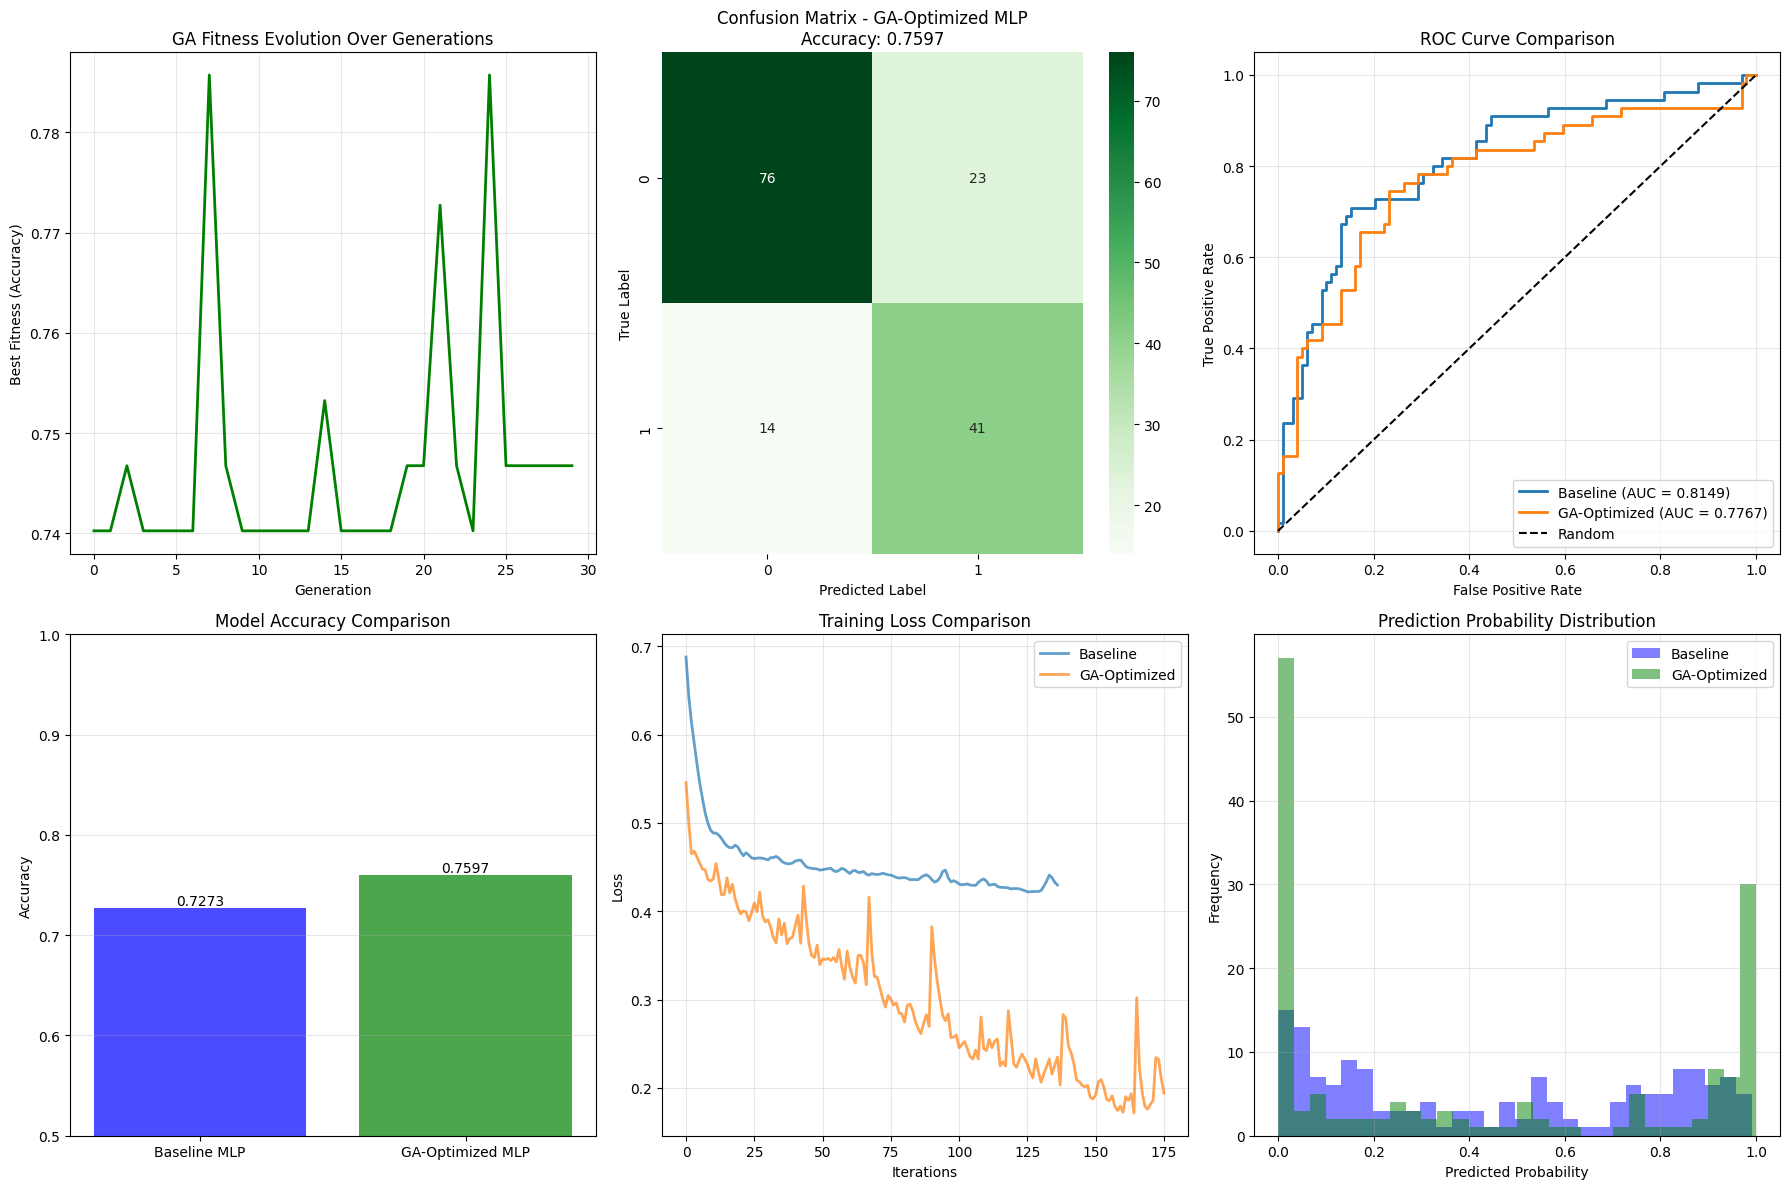


FINAL SUMMARY REPORT

Baseline MLP:
  - Accuracy: 0.7273
  - ROC-AUC: 0.8149

GA-Optimized MLP:
  - Accuracy: 0.7597
  - ROC-AUC: 0.7767

Improvement:
  - Accuracy: +0.0325 (4.46%)
  - ROC-AUC: +-0.0382 (-4.69%)


In [38]:
# Step 11: Comparison Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. GA Fitness Evolution
axes[0, 0].plot(ga_optimizer.fitness_history, linewidth=2, color='green')
axes[0, 0].set_xlabel('Generation')
axes[0, 0].set_ylabel('Best Fitness (Accuracy)')
axes[0, 0].set_title('GA Fitness Evolution Over Generations')
axes[0, 0].grid(True, alpha=0.3)

# 2. Confusion Matrix - Optimized
cm_optimized = confusion_matrix(Y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title(f'Confusion Matrix - GA-Optimized MLP\nAccuracy: {accuracy_optimized:.4f}')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# 3. ROC Curve Comparison
fpr_optimized, tpr_optimized, _ = roc_curve(Y_test, y_pred_proba_optimized)
axes[0, 2].plot(fpr_baseline, tpr_baseline, label=f'Baseline (AUC = {roc_auc_baseline:.4f})', linewidth=2)
axes[0, 2].plot(fpr_optimized, tpr_optimized, label=f'GA-Optimized (AUC = {roc_auc_optimized:.4f})', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--', label='Random')
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curve Comparison')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Accuracy Comparison
models = ['Baseline MLP', 'GA-Optimized MLP']
accuracies = [accuracy_baseline, accuracy_optimized]
colors = ['blue', 'green']
bars = axes[1, 0].bar(models, accuracies, color=colors, alpha=0.7)
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Model Accuracy Comparison')
axes[1, 0].set_ylim([0.5, 1.0])
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{acc:.4f}', ha='center', va='bottom')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Training Loss Comparison
axes[1, 1].plot(mlp_baseline.loss_curve_, label='Baseline', linewidth=2, alpha=0.7)
axes[1, 1].plot(mlp_optimized.loss_curve_, label='GA-Optimized', linewidth=2, alpha=0.7)
axes[1, 1].set_xlabel('Iterations')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Training Loss Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Prediction Probability Distribution Comparison
axes[1, 2].hist(y_pred_proba_baseline, bins=30, alpha=0.5, label='Baseline', color='blue')
axes[1, 2].hist(y_pred_proba_optimized, bins=30, alpha=0.5, label='GA-Optimized', color='green')
axes[1, 2].set_xlabel('Predicted Probability')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Prediction Probability Distribution')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 12: Summary Report
print("\n" + "="*60)
print("FINAL SUMMARY REPORT")
print("="*60)
print(f"\nBaseline MLP:")
print(f"  - Accuracy: {accuracy_baseline:.4f}")
print(f"  - ROC-AUC: {roc_auc_baseline:.4f}")
print(f"\nGA-Optimized MLP:")
print(f"  - Accuracy: {accuracy_optimized:.4f}")
print(f"  - ROC-AUC: {roc_auc_optimized:.4f}")
print(f"\nImprovement:")
print(f"  - Accuracy: +{(accuracy_optimized - accuracy_baseline):.4f} ({((accuracy_optimized - accuracy_baseline)/accuracy_baseline * 100):.2f}%)")
print(f"  - ROC-AUC: +{(roc_auc_optimized - roc_auc_baseline):.4f} ({((roc_auc_optimized - roc_auc_baseline)/roc_auc_baseline * 100):.2f}%)")
print("="*60)